In [1]:
import susie
import numpy as np
import pandas as pd
from susie.timing_data import TimingData
from susie.ephemeris import Ephemeris
import matplotlib.pyplot as plt

In [2]:
url = 'all_lit_times_HAT-P-23b (1).csv'
# Read the CSV file directly from the URL
data = pd.read_csv(url)
# tra_or_occs = np.array(data["tra_or_occ"])#change names to columns needed
epochs = np.array(data["Epoch"].astype('int'))
mid_times = np.array(data["Midtime"])
mid_time_errs = np.array(data["Midtime_err_minus_days"])

In [3]:
# Create new transit times object with above data
timing_obj1 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, tra_or_occ=None, time_scale='tdb')
ephemeris_obj1 = Ephemeris(timing_obj1)

In [4]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
linear_model_data = ephemeris_obj1.get_model_ephemeris('linear')
for key, value in linear_model_data.items():
    print(f"{key}: {value}\n")

period: 1.2128864115502989

period_err: 1.6325978064425378e-07

conjunction_time: 2454632.7329962943

conjunction_time_err: 0.00040977744567887976

model_type: linear

model_data: [2454632.73299629 2454718.84793151 2454723.69947716 2454774.64070645
 2454852.26543678 2454942.01903124 2455026.92108005 2455715.84056181
 2455736.45963081 2455777.6977688  2455783.76220086 2455789.82663291
 2455793.46529215 2455794.67817856 2456130.64771456 2456135.49926021
 2456176.7373982  2456193.71780796 2456204.63378566 2456210.69821772
 2456460.5528185  2456477.53322826 2456500.57807008 2456505.42961573
 2456512.7069342  2456539.39043525 2456894.76615384 2456911.7465636
 2457268.33516859 2457548.51192966 2457565.49233942 2457571.55677148
 2457588.53718124 2457599.45315895 2457622.49800077 2457627.34954641
 2457633.41397847 2457639.47841053 2457918.44228518 2457924.50671724
 2457954.82887753 2457958.46753677 2457959.68042318 2457964.53196882
 2457981.51237858 2458003.34433399 2458026.38917581 2458032.45

In [5]:
# Getting a quadratic model will solve for period, conjuction time, and period change per epoch (and their respective errors)
quadratic_model_data = ephemeris_obj1.get_model_ephemeris('quadratic')
for key, value in quadratic_model_data.items():
    print(f"{key}: {value}\n")

period: 1.2128865609928141

period_err: 5.533959560498279e-07

conjunction_time: 2454632.7329126294

conjunction_time_err: 0.0005256316089907757

period_change_by_epoch: -7.855197742268061e-11

period_change_by_epoch_err: 2.7760737406237266e-10

model_type: quadratic

model_data: [2454632.73291263 2454718.84785826 2454723.69940448 2454774.64063973
 2454852.26537888 2454942.01898313 2455026.9210408  2455715.84058028
 2455736.45965061 2455777.69779121 2455783.76222364 2455789.82665607
 2455793.46531553 2455794.67820201 2456130.64775555 2456135.49930141
 2456176.73744113 2456193.71785157 2456204.63382971 2456210.698262
 2456460.55287085 2456477.53328104 2456500.57812341 2456505.42966917
 2456512.70698781 2456539.39048945 2456894.76621227 2456911.74662207
 2457268.33522421 2457548.51197827 2457565.49238747 2457571.55681933
 2457588.53722851 2457599.45320583 2457622.49804683 2457627.3495923
 2457633.41402413 2457639.47845596 2457918.44231812 2457924.50674986
 2457954.82890854 2457958.467567

In [6]:
linear_bic_value = ephemeris_obj1.calc_bic(linear_model_data)
quadratic_bic_value = ephemeris_obj1.calc_bic(quadratic_model_data)

print(f"Linear Model BIC: {linear_bic_value}\nQuadratic Model BIC: {quadratic_bic_value}")

Linear Model BIC: 963.6089709520119
Quadratic Model BIC: 967.1088115480072


In [7]:
delta_bic_value = ephemeris_obj1.calc_delta_bic()

print(f"\u0394 BIC: {delta_bic_value}")

Δ BIC: -3.4998405959953516


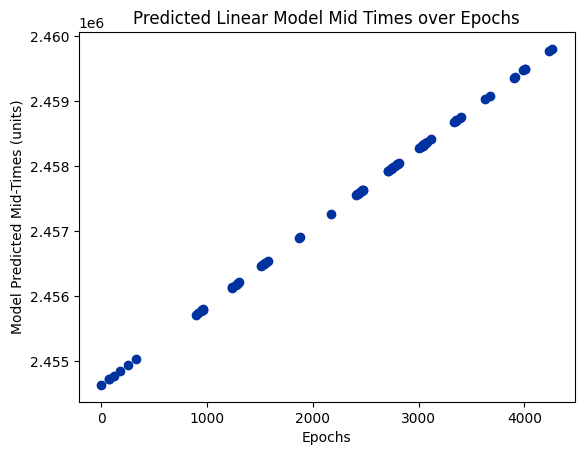

In [8]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(linear_model_data, save_plot=False)

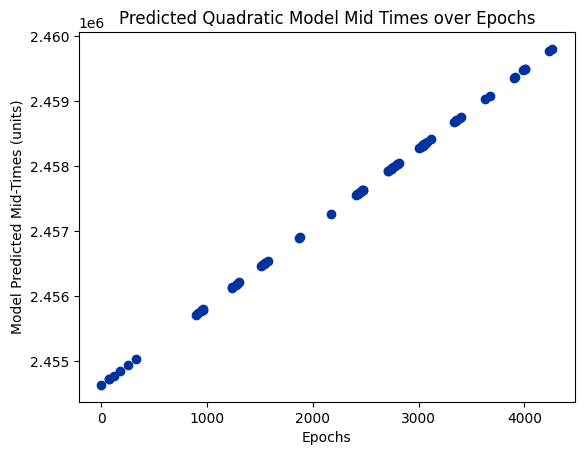

In [9]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(quadratic_model_data, save_plot=False)

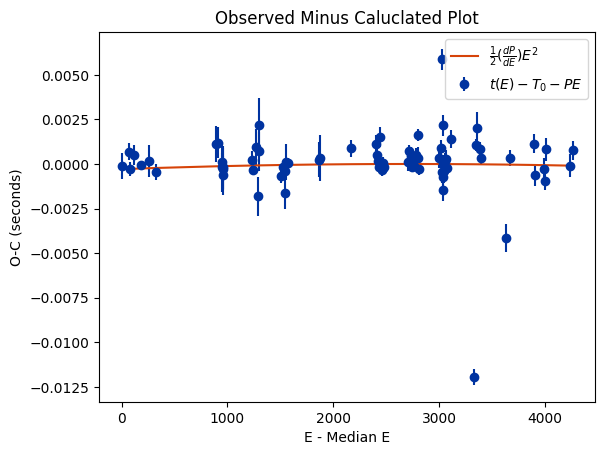

In [10]:
ephemeris_obj1.plot_oc_plot()